In [27]:
import numpy as np
import pandas as pd
import string
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display

In [29]:


def random_customer_id():
    num = ''.join(random.choices(string.digits, k=4))      
    letters = ''.join(random.choices(string.ascii_uppercase, k=4))  
    return f"{num}-{letters}"



In [ ]:
import numpy as np

def generate_data(n=500):
    np.random.seed(42)

    gender = np.random.choice(["Male", "Female"], size=n)
    senior = np.random.choice([0, 1], size=n, p=[0.84, 0.16])
    partner = np.where(np.random.rand(n) < 0.55, "Yes", "No")
    dependents = np.where(np.random.rand(n) < 0.3, "Yes", "No")
    tenure = np.random.randint(0, 73, size=n)

    phone_service = np.where(np.random.rand(n) < 0.9, "Yes", "No")
    multiple_lines = []
    for ps in phone_service:
        if ps == "No":
            multiple_lines.append("No phone service")
        else:
            multiple_lines.append(np.random.choice(["Yes", "No"], p=[0.35, 0.65]))
    multiple_lines = np.array(multiple_lines)

    internet_service = np.random.choice(
        ["DSL", "Fiber optic", "No"], size=n, p=[0.35, 0.5, 0.15]
    )

    return gender, senior, partner, dependents, tenure, phone_service, multiple_lines, internet_service


In [39]:


def dep_service(internet_service, base_prob_yes, none_label="No internet service"):
    out = []
    for s in internet_service:
        if s == "No":
            out.append(none_label)
        else:
            out.append(np.random.choice(["Yes", "No"], p=[base_prob_yes, 1 - base_prob_yes]))
    return np.array(out)
online_security = dep_service(internet_service, 0.36)
online_backup = dep_service(internet_service, 0.45)
device_protection = dep_service(internet_service, 0.46)
tech_support = dep_service(internet_service, 0.34)
streaming_tv = dep_service(internet_service, 0.5)
streaming_movies = dep_service(internet_service, 0.5)

contract = np.random.choice(
    ["Month-to-month", "One year", "Two year"], size=n, p=[0.57, 0.22, 0.21]
)

paperless = np.where(
    (contract == "Month-to-month") & (np.random.rand(n) < 0.75),
    "Yes",
    np.where(np.random.rand(n) < 0.45, "Yes", "No")
)

payment_method = np.where(
    paperless == "Yes",
    np.random.choice(
        ["Electronic check", "Bank transfer (automatic)", "Credit card (automatic)"],
        size=n, p=[0.55, 0.23, 0.22]
    ),
    np.random.choice(
        ["Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"],
        size=n, p=[0.55, 0.25, 0.20]
    )
)

base_charge = np.where(
    internet_service == "No",
    np.random.uniform(15, 30, size=n),
    np.where(
        internet_service == "DSL",
        np.random.uniform(45, 75, size=n),
        np.random.uniform(70, 110, size=n)
    )
)


In [40]:
def add_if_yes(arr, amount):
 return np.where(arr == "Yes", amount, 0.0)


monthly = (
base_charge
+ add_if_yes(multiple_lines, 5)
+ add_if_yes(online_security, 6)
+ add_if_yes(online_backup, 5)
+ add_if_yes(device_protection, 5)
+ add_if_yes(tech_support, 7)
+ add_if_yes(streaming_tv, 8)
+ add_if_yes(streaming_movies, 8)
)
monthly = monthly + np.random.normal(0, 2.5, size=n)
monthly = np.clip(monthly, 18, None).round(2)


total = (monthly * tenure + np.random.normal(0, 20, size=n)).clip(min=0)
total = np.where(tenure == 0, 0, total).round(2)


logit = (
-0.8
+ 0.9 * (contract == "Month-to-month").astype(float)
- 0.6 * (contract == "Two year").astype(float)
+ 0.5 * (payment_method == "Electronic check").astype(float)
+ 0.4 * (internet_service == "Fiber optic").astype(float)
- 0.5 * (online_security == "Yes").astype(float)
- 0.5 * (tech_support == "Yes").astype(float)
- 0.02 * tenure
+ 0.015 * (monthly - monthly.mean())
+ 0.25 * senior
)
prob_churn = 1 / (1 + np.exp(-logit))
churn = np.where(np.random.rand(n) < prob_churn, "Yes", "No")

In [ ]:
def generate_data(n=500):
    np.random.seed(42)


    df = pd.DataFrame({
        "customerID": [random_customer_id() for _ in range(n)],
        "gender": gender,
        "SeniorCitizen": senior,
        "Partner": partner,
        "Dependents": dependents,
        "tenure": tenure,
        "PhoneService": phone_service,
        "MultipleLines": multiple_lines,
        "InternetService": internet_service,
        "OnlineSecurity": online_security,
        "OnlineBackup": online_backup,
        "DeviceProtection": device_protection,
        "TechSupport": tech_support,
        "StreamingTV": streaming_tv,
        "StreamingMovies": streaming_movies,
        "Contract": contract,
        "PaperlessBilling": paperless,
        "PaymentMethod": payment_method,
        "MonthlyCharges": monthly.astype(float),
        "TotalCharges": total.astype(float),
        "Churn": churn
    })
    
    return df




In [48]:
X = df.drop(columns=["customerID","Churn"])
y = df["Churn"]

In [53]:
X_encoded = X.copy()
label_encoders = {}

for col in X_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le  
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\rk750\Devlopment\test0\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [54]:
filepath = "customer_churn_500.csv"
df.to_csv(filepath, index=False)
print(f"CSV file saved as {filepath}")
print(df.head(10))

CSV file saved as customer_churn_500.csv
  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7657-GEST    Male              0     Yes         No      38          Yes   
1  8854-NJAD  Female              0      No         No       4           No   
2  2179-LJCJ    Male              1      No        Yes      64          Yes   
3  3480-BVNC    Male              0     Yes        Yes      12          Yes   
4  2951-QNRY    Male              0     Yes         No      52          Yes   
5  6818-GDTK  Female              0      No         No      44          Yes   
6  3563-MROA    Male              1      No        Yes      31          Yes   
7  6435-QBJO    Male              0     Yes         No      35          Yes   
8  5963-KLBQ    Male              0      No        Yes      59          Yes   
9  5582-MQCY  Female              0      No         No      10          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0                No     

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        500 non-null    object 
 1   gender            500 non-null    object 
 2   SeniorCitizen     500 non-null    int64  
 3   Partner           500 non-null    object 
 4   Dependents        500 non-null    object 
 5   tenure            500 non-null    int64  
 6   PhoneService      500 non-null    object 
 7   MultipleLines     500 non-null    object 
 8   InternetService   500 non-null    object 
 9   OnlineSecurity    500 non-null    object 
 10  OnlineBackup      500 non-null    object 
 11  DeviceProtection  500 non-null    object 
 12  TechSupport       500 non-null    object 
 13  StreamingTV       500 non-null    object 
 14  StreamingMovies   500 non-null    object 
 15  Contract          500 non-null    object 
 16  PaperlessBilling  500 non-null    object 
 1

In [56]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,500.000000,500.000000,500.000000,500.000000
mean,0.164000,34.740000,86.727540,3023.504640
std,0.370646,21.018372,33.092291,2264.442406
min,0.000000,0.000000,18.000000,0.000000
25%,0.000000,17.000000,71.232500,1063.937500
50%,0.000000,33.000000,92.030000,2591.130000
75%,0.000000,53.250000,111.762500,4619.735000
max,1.000000,72.000000,145.190000,9424.970000


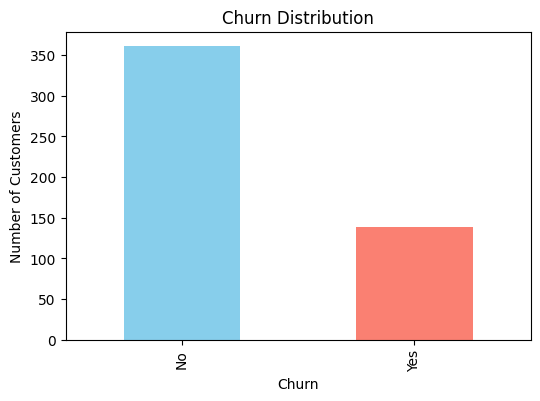

In [57]:
plt.figure(figsize=(6,4))
df["Churn"].value_counts().plot(kind="bar", color=["skyblue","salmon"])
plt.title("Churn Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Churn")
plt.show()

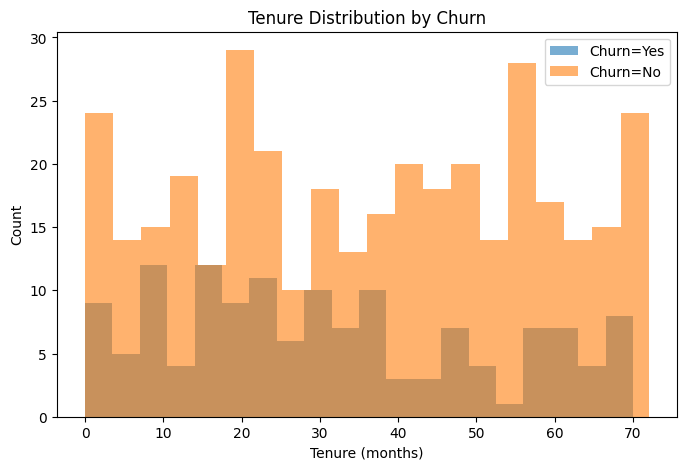

In [58]:
plt.figure(figsize=(8,5))
df[df["Churn"]=="Yes"]["tenure"].plot(kind="hist", bins=20, alpha=0.6, label="Churn=Yes")
df[df["Churn"]=="No"]["tenure"].plot(kind="hist", bins=20, alpha=0.6, label="Churn=No")
plt.legend()
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

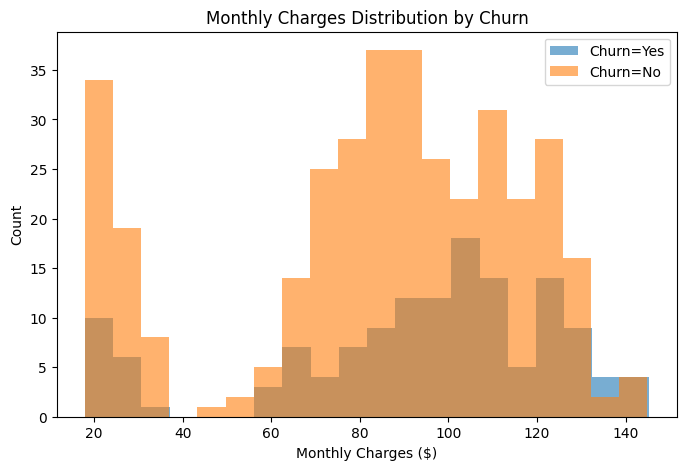

In [59]:
plt.figure(figsize=(8,5))
df[df["Churn"]=="Yes"]["MonthlyCharges"].plot(kind="hist", bins=20, alpha=0.6, label="Churn=Yes")
df[df["Churn"]=="No"]["MonthlyCharges"].plot(kind="hist", bins=20, alpha=0.6, label="Churn=No")
plt.legend()
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()

<Figure size 700x500 with 0 Axes>

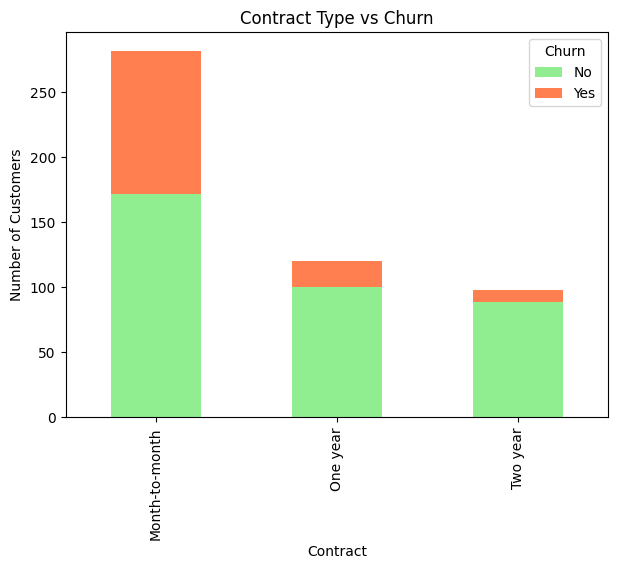

In [60]:
plt.figure(figsize=(7,5))
pd.crosstab(df["Contract"], df["Churn"]).plot(kind="bar", stacked=True, figsize=(7,5), color=["lightgreen","coral"])
plt.title("Contract Type vs Churn")
plt.ylabel("Number of Customers")
plt.show()

In [61]:
import pickle

with open("customer_churn_500.pkl", "rb") as f:
    df = pickle.load(f)

print(df.head())


  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7657-GEST    Male              0     Yes         No      38          Yes   
1  8854-NJAD  Female              0      No         No       4           No   
2  2179-LJCJ    Male              1      No        Yes      64          Yes   
3  3480-BVNC    Male              0     Yes        Yes      12          Yes   
4  2951-QNRY    Male              0     Yes         No      52          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL             No  ...              Yes   
1  No phone service     Fiber optic             No  ...              Yes   
2                No     Fiber optic             No  ...              Yes   
3                No             DSL             No  ...               No   
4               Yes     Fiber optic            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessB

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        500 non-null    object 
 1   gender            500 non-null    object 
 2   SeniorCitizen     500 non-null    int64  
 3   Partner           500 non-null    object 
 4   Dependents        500 non-null    object 
 5   tenure            500 non-null    int64  
 6   PhoneService      500 non-null    object 
 7   MultipleLines     500 non-null    object 
 8   InternetService   500 non-null    object 
 9   OnlineSecurity    500 non-null    object 
 10  OnlineBackup      500 non-null    object 
 11  DeviceProtection  500 non-null    object 
 12  TechSupport       500 non-null    object 
 13  StreamingTV       500 non-null    object 
 14  StreamingMovies   500 non-null    object 
 15  Contract          500 non-null    object 
 16  PaperlessBilling  500 non-null    object 
 1

In [63]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,500.000000,500.000000,500.000000,500.000000
mean,0.164000,34.740000,86.727540,3023.504640
std,0.370646,21.018372,33.092291,2264.442406
min,0.000000,0.000000,18.000000,0.000000
25%,0.000000,17.000000,71.232500,1063.937500
50%,0.000000,33.000000,92.030000,2591.130000
75%,0.000000,53.250000,111.762500,4619.735000
max,1.000000,72.000000,145.190000,9424.970000


In [64]:
print("\n--- Predict a single customer ---")

example = df.sample(1, random_state=1).drop(columns=["customerID","Churn"])
example_encoded = example.copy()
for col in example_encoded.select_dtypes(include="object").columns:
 example_encoded[col] = label_encoders[col].transform(example_encoded[col])


pred = model.predict(example_encoded)[0]
prob = model.predict_proba(example_encoded)[0][1]
print(example)
print(f"Prediction: {pred} (Churn probability={prob:.2f})")


--- Predict a single customer ---
     gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
304  Female              1      No        Yes      14          Yes   

    MultipleLines InternetService OnlineSecurity OnlineBackup  \
304           Yes     Fiber optic             No          Yes   

    DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
304               No          No         Yes              No  One year   

    PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
304               No  Bank transfer (automatic)          121.25       1699.91  
Prediction: Yes (Churn probability=0.54)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        500 non-null    object 
 1   gender            500 non-null    object 
 2   SeniorCitizen     500 non-null    int64  
 3   Partner           500 non-null    object 
 4   Dependents        500 non-null    object 
 5   tenure            500 non-null    int64  
 6   PhoneService      500 non-null    object 
 7   MultipleLines     500 non-null    object 
 8   InternetService   500 non-null    object 
 9   OnlineSecurity    500 non-null    object 
 10  OnlineBackup      500 non-null    object 
 11  DeviceProtection  500 non-null    object 
 12  TechSupport       500 non-null    object 
 13  StreamingTV       500 non-null    object 
 14  StreamingMovies   500 non-null    object 
 15  Contract          500 non-null    object 
 16  PaperlessBilling  500 non-null    object 
 1

In [68]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,500.000000,500.000000,500.000000,500.000000
mean,0.164000,34.740000,86.727540,3023.504640
std,0.370646,21.018372,33.092291,2264.442406
min,0.000000,0.000000,18.000000,0.000000
25%,0.000000,17.000000,71.232500,1063.937500
50%,0.000000,33.000000,92.030000,2591.130000
75%,0.000000,53.250000,111.762500,4619.735000
max,1.000000,72.000000,145.190000,9424.970000
